In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies['title'].value_counts()

title
Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
                                         ..
Lost and Delirious (2001)                 1
Rape Me (Baise-moi) (2000)                1
Alice (1990)                              1
Another Woman (1988)                      1
Andrew Dice Clay: Dice Rules (1991)       1
Name: count, Length: 9737, dtype: int64

# Feature Engineering (extracting `years`)

In [4]:
# Function to extract years
def extract_years(movie):
    """
    This function will extract the release year of the movie 
    by takes 4 digits of numerals in parentheses at the end 
    of the title. The output will be the release year of the 
    movie in integar format. If the title does not have the 
    release date, the output will be 0 as a missing value.

    movie: string
    """

    year_digits = movie.rstrip(" )")[-4:]

    if year_digits.isdigit():
        year = int(year_digits)
    else:
        year = 0
    return year

In [5]:
movies['year'] = movies['title'].apply(extract_years)

movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [6]:
ratings = pd.read_csv("ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies = pd.merge(movies, ratings, on='movieId', how='inner')

movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   year       100836 non-null  int64  
 4   userId     100836 non-null  int64  
 5   rating     100836 non-null  float64
 6   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.4+ MB


# Feature Engineering (separate `genres`)

In [9]:
movies['genres'] = movies['genres'].str.split("|")
movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483


In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binary_encoded_genres = mlb.fit_transform(movies['genres'])
genre_names = list(mlb.classes_)
binary_encoded_df = pd.DataFrame(binary_encoded_genres, columns=genre_names)
movies = pd.concat([movies, binary_encoded_df], axis=1)

movies.tail()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017,184,4.0,1537109082,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,184,3.5,1537109545,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,193585,Flint (2017),[Drama],2017,184,3.5,1537109805,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,184,3.5,1537110021,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100835,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy],1991,331,4.0,1537157606,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
movies['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [12]:
movies.loc[movies['rating'] == 0]

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [13]:
movies['(no genres listed)'].value_counts()

(no genres listed)
0    100789
1        47
Name: count, dtype: int64

In [14]:
movies = movies.loc[movies['(no genres listed)'] == 0]
movies.head()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Data Exploration (`year`)

In [15]:
movies.loc[movies['year'] == 0]

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
81292,40697,Babylon 5,[Sci-Fi],0,210,4.0,1527266191,0,0,0,...,0,0,0,0,0,0,1,0,0,0
81293,40697,Babylon 5,[Sci-Fi],0,528,0.5,1391736467,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99325,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,209,3.5,1524522239,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99326,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,305,4.5,1533043577,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99327,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,380,3.0,1534176158,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99328,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,514,3.0,1533946119,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99617,149334,Nocturnal Animals,"[Drama, Thriller]",0,306,3.0,1518380372,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100051,162414,Moonlight,[Drama],0,462,5.0,1478489531,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
grouped_year = movies.loc[movies['year'] >= 1960].groupby("year")

In [17]:
year_counts = dict(grouped_year['movieId'].count())

Text(0, 0.5, 'Number of Movies')

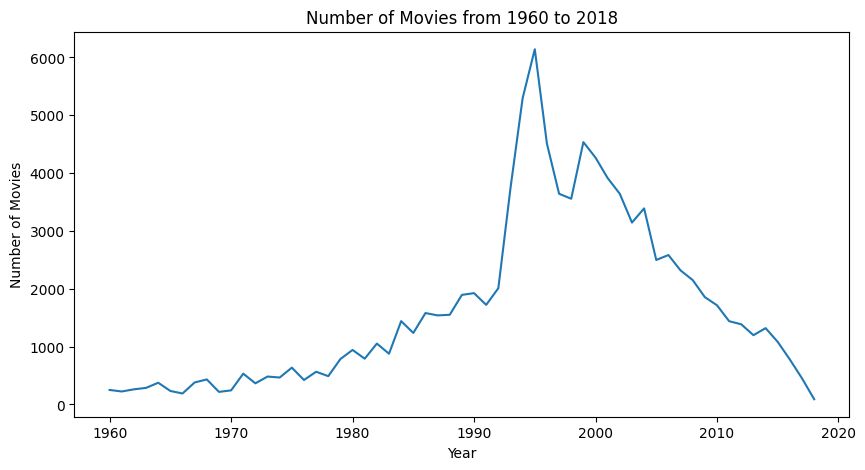

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
x = year_counts.keys()
y = year_counts.values()
ax.plot(x, y)
ax.set_title("Number of Movies from 1960 to 2018")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")

# Data Exploration (`genres`)

In [19]:
# Counts of ratings per each genre
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(movies.loc[movies[genre] == 1])

genre_count

{'(no genres listed)': 0,
 'Action': 30635,
 'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Crime': 16681,
 'Documentary': 1219,
 'Drama': 41928,
 'Fantasy': 11834,
 'Film-Noir': 870,
 'Horror': 7291,
 'IMAX': 4145,
 'Musical': 4138,
 'Mystery': 7674,
 'Romance': 18124,
 'Sci-Fi': 17243,
 'Thriller': 26452,
 'War': 4859,
 'Western': 1930}

In [20]:
# 5 most reviewed movies
top_5_genres = [genre[0] for genre in sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:6]]
top_5_genres

['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance']

Text(0.5, 0.01, 'Rating')

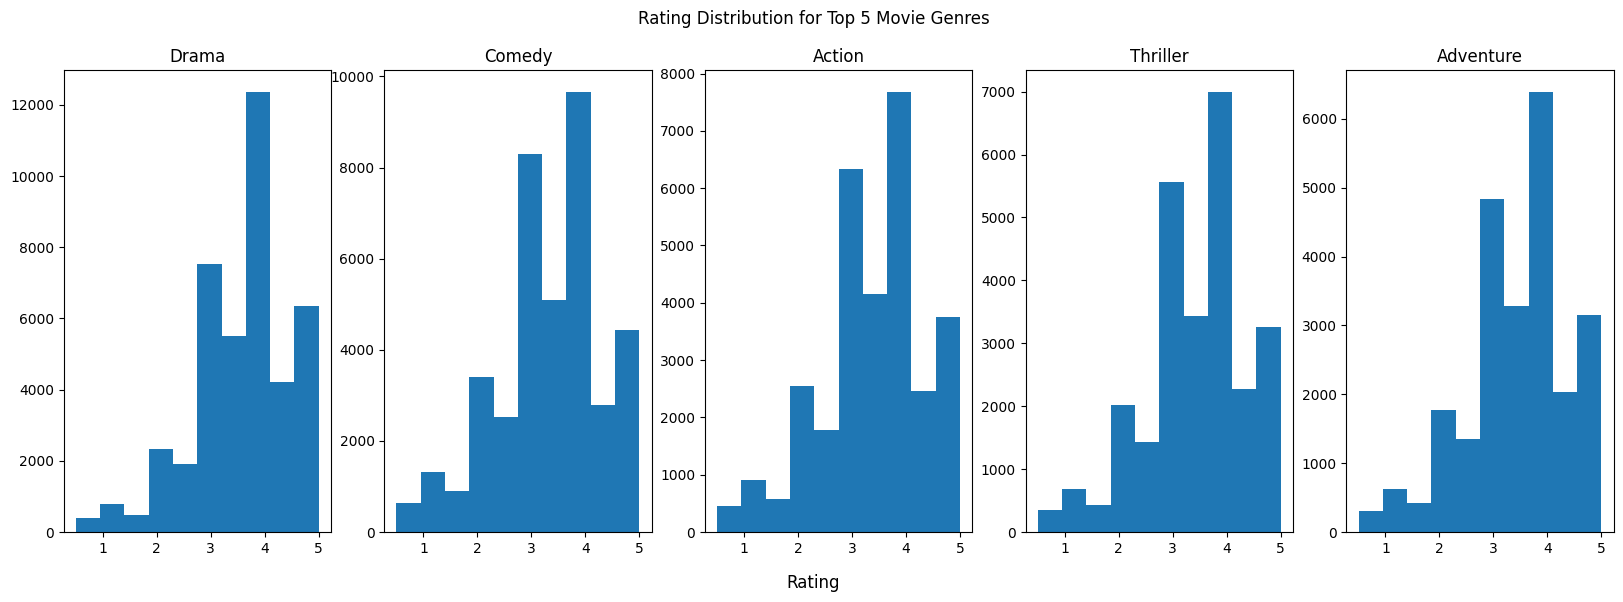

In [21]:
# Rating distribution of top 5 movie genres
fig, axes = plt.subplots(1,5, figsize=(20,6))

for i in range(5):
    genre = top_5_genres[i]
    axes[i].hist(movies.loc[movies[genre] == 1]['rating'])
    axes[i].set_title(genre)

fig.suptitle("Rating Distribution for Top 5 Movie Genres")
fig.supxlabel("Rating")


In [22]:
# Median ratings
for genre in genre_names:
    print(f"Median rating of {genre}: {movies.loc[movies[genre] == 1]['rating'].median()}")

Median rating of (no genres listed): nan
Median rating of Action: 3.5
Median rating of Adventure: 3.5
Median rating of Animation: 4.0
Median rating of Children: 3.5
Median rating of Comedy: 3.5
Median rating of Crime: 4.0
Median rating of Documentary: 4.0
Median rating of Drama: 4.0
Median rating of Fantasy: 3.5
Median rating of Film-Noir: 4.0
Median rating of Horror: 3.5
Median rating of IMAX: 4.0
Median rating of Musical: 3.5
Median rating of Mystery: 4.0
Median rating of Romance: 3.5
Median rating of Sci-Fi: 3.5
Median rating of Thriller: 3.5
Median rating of War: 4.0
Median rating of Western: 4.0


# Data Exploration (most rated movies)

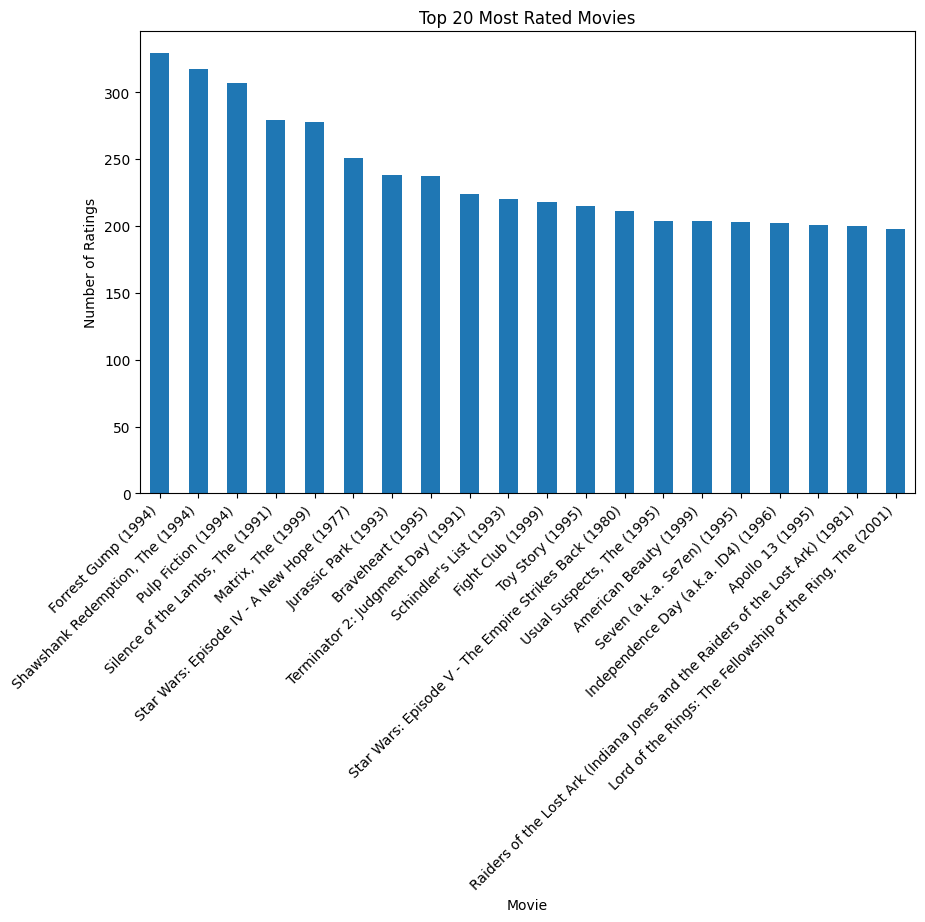

In [23]:
rating_counts = movies.groupby('title')['rating'].count()
plt.figure(figsize=(10, 6))
rating_counts.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Movie')
plt.ylabel('Number of Ratings')
plt.title('Top 20 Most Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

# Feature Engineering (Genre Preference of Individual Users)

### To Recommend movies to a new user only with genre preference

Since our business problem is genre-driven, we want to see genre preference of individual users. We create a separate dataframe with each user as an entry, and all genres as variables. We calculate the median ratings for each genre from individual users. The **threshold** of preference is set as **4.0**, which means that the genre preference is considered when the median rating for a given genre is higher than 4.0. **1** from the final dataframe `genre_pref_df` represents genre preference.

In [24]:
# median values of individual users for each genre
median_ratings = {}
for genre in genre_names:
    median_ratings[genre] = movies.loc[movies[genre] == 1].groupby('userId')['rating'].median()

user_ratings_df = pd.DataFrame(median_ratings).reset_index()

user_ratings_df.head()

,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,NaN,4.0,5.0,5.0,5.0,4.0,5.0,NaN,5.0,...,5.0,4.00,NaN,5.0,5.0,4.0,4.00,4.0,5.0,4.0
1,2,NaN,4.0,4.0,NaN,NaN,4.0,4.0,5.0,4.0,...,NaN,3.00,3.75,NaN,4.0,4.5,3.75,4.0,4.5,3.5
2,3,NaN,4.5,3.0,0.5,0.5,0.5,0.5,NaN,0.5,...,NaN,4.75,NaN,0.5,5.0,0.5,5.00,5.0,0.5,NaN
3,4,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.5,4.00,3.00,4.0,4.0,3.5,2.50,4.0,4.0,4.0
4,5,NaN,3.0,3.0,4.5,4.0,3.0,4.0,NaN,4.0,...,NaN,3.00,3.00,5.0,4.0,3.0,2.50,4.0,4.0,3.0


In [25]:
# preprocess to get the genre preference

from sklearn.preprocessing import Binarizer

threshold = 4.0

# getting the genre columns only
genre_columns = user_ratings_df.drop(["userId", "(no genres listed)"], axis=1).fillna(0)

# fit and transform via Binarizer
binarizer = Binarizer(threshold=threshold, copy=True)
genre_columns = binarizer.fit_transform(genre_columns)

# genre columns with preference
genre_pref_df = pd.DataFrame(genre_columns, columns=binarizer.get_feature_names_out())

# user Id column
user_id = user_ratings_df['userId']

# concatenate both
genre_pref_df = pd.concat([user_ratings_df['userId'], genre_pref_df], axis=1)
genre_pref_df.head(10)

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Genre Preference from a New User

Let's add our new user to the genre preference matrix. Our new user, Simon, has selected **Action**, **Adventure**, and **Mystery** as preferred genres upon signing up to the streaming service platform.

### Add the new user information to the genre preference dataframe

In [26]:
def add_new_user(new_user, df):
    
    new_user_df = pd.DataFrame(new_user, index=[0])
    new_genre_pref_df = pd.concat([df, new_user_df], axis=0).reset_index(drop=True)
    
    return new_genre_pref_df.fillna(0)

In [27]:
new_user = {'userId': 611, 'Action': 1, 'Adventure': 1, 'Mystery': 1}

new_genre_pref_df = add_new_user(new_user, genre_pref_df)

In [28]:
new_genre_pref_df.tail()

,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
606,607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
607,608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,611,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Our new user has been added at the bottom of the dataframe, and is assigned `611` as the `userId`.

### Find similar user(s) based on Pearson Correlation Coefficient

In [29]:
def find_similar_users(target_user, df, threshold=0.6):
    target_coef = pd.DataFrame(np.corrcoef(df.drop("userId", axis=1)))[target_user-1]
    target_coef = target_coef.sort_values(ascending=False).fillna(0)
    similar_users = [key for key, value in target_coef.items() if threshold < value <= 1]
    similar_users.remove(target_user-1)

    return similar_users

In [30]:
similar_users = find_similar_users(target_user=611, df=new_genre_pref_df, threshold=0.6)
similar_users

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[577]

### Select 5 random movies with the highest rating from the similar user's rating history

In [31]:
def genre_recommendation(user_id, genre_1, genre_2, genre_3, sample_num=5):
    similar_df = movies.loc[movies['userId'] == user_id].loc[(movies[genre_1] == 1) | (movies[genre_2] == 1) | (movies[genre_3] == 1)]
    max_rating = similar_df['rating'].max()
    final_movies = similar_df.loc[similar_df['rating'] == max_rating].sample(n=sample_num, replace=False)

    return final_movies

In [32]:
genre_recommendation(user_id=similar_users[0], 
                    genre_1='Action', 
                    genre_2='Adventure', 
                    genre_3='Mystery', 
                    sample_num=5)

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
38758,2028,Saving Private Ryan (1998),"[Action, Drama, War]",1998,577,5.0,945966132,0,1,0,...,0,0,0,0,0,0,0,0,1,0
20487,908,North by Northwest (1959),"[Action, Adventure, Mystery, Romance, Thriller]",1959,577,5.0,945966653,0,1,1,...,0,0,0,0,1,1,0,1,0,0
39599,2094,"Rocketeer, The (1991)","[Action, Adventure, Sci-Fi]",1991,577,5.0,945965845,0,1,1,...,0,0,0,0,0,0,1,0,0,0
7086,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",1977,577,5.0,945965658,0,1,1,...,0,0,0,0,0,0,1,0,0,0
31120,1387,Jaws (1975),"[Action, Horror]",1975,577,5.0,945967287,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Recommendation system after rating a movie

### `KNNBasic` to get similar users

The new user is expected to provide the streaming service platform with movie rating information as time passes. Once this information is received, different approaches can be taken to provide more tailored movie recommendations. We try three different types of distance to determine the closest neighbors: `MSD`, `pearson`, and `cosine`.

In [33]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.accuracy import mae

reader = Reader()
knn_data = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader=reader)

# train test split for knn because CV takes way too long...
train, test = train_test_split(knn_data, random_state=42)

sim_options = {'name': 'MSD',
               'user_based': True
               }
knn = KNNBasic(sim_options = sim_options).fit(train)
knn.test(test)
mae(knn.test(test))


Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7159


0.7158954350660606

In [34]:
sim_options_pearson = {'name': 'pearson',
               'user_based': True
               }
knn_pearson = KNNBasic(sim_options = sim_options_pearson).fit(train)
knn_pearson.test(test)
mae(knn_pearson.test(test))

Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.7432


0.7431803893912714

In [35]:
sim_options_cosine = {'name': 'cosine',
               'user_based': True
               }
knn_cosine = KNNBasic(sim_options = sim_options_cosine).fit(train)
knn_cosine.test(test)
mae(knn.test(test))

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7159


0.7158954350660606

We determine that `MSD` or `cosine` parameter yields smaller mean absolute error; thus, we decide to use one of these parameters for our `KNNBasic` model.

In [36]:
movies.tail()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017,184,4.0,1537109082,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,184,3.5,1537109545,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,193585,Flint (2017),[Drama],2017,184,3.5,1537109805,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,184,3.5,1537110021,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100835,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy],1991,331,4.0,1537157606,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, our new user has watched a movie and decided to provide a rating.

In [37]:
new_rating = {'movieId': 74458, 'title': 'Shutter Island (2010)', 
            'year': 2010, 'userId': 611, 'rating': 5.0,
            'Drama': 1, 'Mystery': 1, 'Thriller': 1}

new_movies = add_new_user(new_rating, movies)
new_movies.tail()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100785,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,184,3.5,1.537110e+09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
100786,193585,Flint (2017),[Drama],2017,184,3.5,1.537110e+09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
100787,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,184,3.5,1.537110e+09,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
100788,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy],1991,331,4.0,1.537158e+09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
100789,74458,Shutter Island (2010),0,2010,611,5.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,0.0,0.0


In [49]:
data_new = Dataset.load_from_df(new_movies[['userId', 'movieId', 'rating']], reader=reader)

train_new, test_new = train_test_split(data_new, random_state=42)

knn = KNNBasic(sim_options = sim_options).fit(train_new)
knn.test(test_new)
mae(knn.test(test_new))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7181


0.7180925500587559

In [50]:
user_id = 611

user_inner_id = train_new.to_inner_uid(user_id)
user_neighbors = knn.get_neighbors(user_inner_id, k=5)
user_neighbors

[6, 73, 140, 183, 213]

In [51]:
def new_movie_recommendations(user_id, new_movies, sample_num):

    similar_df = new_movies.loc[new_movies['userId'] == user_id]
    max_rating = similar_df['rating'].max()
    final_movies = similar_df.loc[similar_df['rating'] == max_rating].sample(n=sample_num, replace=False)
    return final_movies

In [52]:
for user in user_neighbors:
    print(new_movie_recommendations(user, new_movies, 1))

      movieId                title                    genres  year  userId   
4949      168  First Knight (1995)  [Action, Drama, Romance]  1995       6  \

      rating    timestamp  (no genres listed)  Action  Adventure  ...   
4949     5.0  845553695.0                 0.0     1.0        0.0  ...  \

      Film-Noir  Horror  IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller   
4949        0.0     0.0   0.0      0.0        0      1.0     0.0         0  \

      War  Western  
4949  0.0      0.0  

[1 rows x 27 columns]
       movieId                 title                         genres  year   
83888    49272  Casino Royale (2006)  [Action, Adventure, Thriller]  2006  \

       userId  rating     timestamp  (no genres listed)  Action  Adventure   
83888      73     5.0  1.464275e+09                 0.0     1.0        1.0  \

       ...  Film-Noir  Horror  IMAX  Musical  Mystery  Romance  Sci-Fi   
83888  ...        0.0     0.0   0.0      0.0        0      0.0     0.0  \

       Thrill

We have randomly selected 1 sample from each close neighbors from our new user.

### `SVD` to get expected ratings for other movies

In [53]:
import surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [54]:
svd = SVD(random_state=42)

In [55]:
cross_validate(svd, data_new, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.87349168, 0.8730018 , 0.87141641, 0.88278616, 0.86777857]),
 'test_mae': array([0.67016725, 0.67265673, 0.66836268, 0.67828642, 0.66784734]),
 'fit_time': (0.6390540599822998,
  0.6616251468658447,
  0.5372447967529297,
  0.6254031658172607,
  0.6237151622772217),
 'test_time': (0.04130697250366211,
  0.046097755432128906,
  0.04527997970581055,
  0.04426288604736328,
  0.12366008758544922)}

In [90]:
svd.fit(train_new)
svd.test(test_new)
mae(svd.test(test_new))

MAE:  0.6663


0.6663276345944833

Compared to the KNN model, SVD model has smaller MAE metric. It predicts what the new user would rate for individual movies, based on the first movie rated by the new user. This model does not take the genre preference into account.

### Predicing ratings of the new user for all movies

In [93]:
movie_id = list(movies['movieId'].value_counts().index)

In [94]:
def predict_ratings(model, user_id, movie_id):
    predictions = {}
    for movie in movie_id:
        predictions[movie] = model.predict(user_id, movie)[3]
    ordered_predictions = {key: value for key, value in sorted(predictions.items(), key=lambda x: x[1], reverse=True)}

    return ordered_predictions


In [96]:
def movie_recommendation(ratings, num):
    recomm_movie_id = list(dict(itertools.islice(ratings.items(), num)).keys())

    movie_list = []

    for movie_id in recomm_movie_id:
        movie_list.append(new_movies.loc[new_movies['movieId'] == movie_id]['title'].unique())
    
    return movie_list



In [99]:
movie_list = movie_recommendation(ratings=predict_ratings(model=svd, user_id=611, movie_id=movie_id), num=5)
movie_list

[array(["Schindler's List (1993)"], dtype=object),
 array(['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'],
       dtype=object),
 array(["One Flew Over the Cuckoo's Nest (1975)"], dtype=object),
 array(['Apocalypse Now (1979)'], dtype=object),
 array(['Brazil (1985)'], dtype=object)]

These movies are 5 recommendations based on the new user's first movie rating. Movie ratings for all movies in the data set are predicted and top 5 most highly rated movies are selected for recommendations.